# Understanding Cumulatative Distribution function

#### A fair 6-side die rolling simulator. A fair die is one for which each face appears with equal likelihood. Roll two dice simultaneously n (=100) times and record the sum of both dice each time

In [2]:
import random as rd
import collections as cs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def roll_dice(n):
    
    
    dices=[]
    #using for loop to roll the dice n times
    for i in range(0,n):
        dices.append(rd.randint(1,6) + rd.randint(1,6))
    
    
    ## Calculating the frequency of sum of dices
    freq_of_sum = cs.Counter(dices)
    
    #fetching the list of sum values obtained by rolling two dices simultaneously
    sum_of_dice = list(freq_of_sum.keys())
    
    #fetching the list of frequencies of sum values obtained by rolling two dices simultaneously
    freq_of_dice = list(freq_of_sum.values())
    
    #Calculating cummulative distribution of sum of dices values
    cdf = np.cumsum(sum_of_dice)
    
    df = pd.DataFrame(columns={'Sum of Dice','Freq of Sum'})
    df['Sum of Dice'] = sum_of_dice
    df['Freq of Sum'] = freq_of_dice
    df.sort_values(by='Sum of Dice',inplace=True)
    df['Prob.'] = df['Freq of Sum']/100
    
    median = int(np.median(sum_of_dice))
    
    prob = list(df['Prob.'])
    cumulative_sum = np.cumsum(prob)
    
    probality_of_9 = df[(df['Sum of Dice']<=9)]
    prob_value= list(probality_of_9['Prob.'])
    prob_value = sum(prob_value)

    
    return sum_of_dice,freq_of_dice,median,cumulative_sum,prob_value

### A readable histogram with frequencies of dice sum outcomes from the simulation

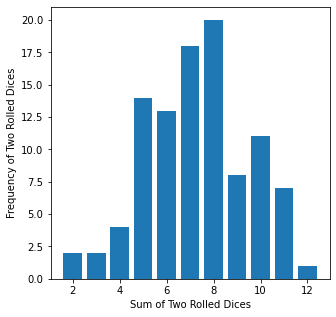

In [4]:
sum_of_dice,freq_of_dice,median,cumulative_sum,prob_value = roll_dice(100)
sum_of_dice1,freq_of_dice1,median1,cumulative_sum1,prob_value1 = roll_dice(100)

### Map Plotting
plt.figure(figsize=[5,5])
plt.bar(sum_of_dice,freq_of_dice)
plt.xlabel("Sum of Two Rolled Dices")
plt.ylabel("Frequency of Two Rolled Dices")

plt.show()


### 3.2 Calculate and plot cumulative distribution function

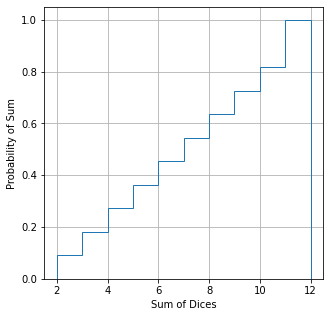

In [5]:
plt.figure(figsize=[5,5])
plt.hist(sum_of_dice,cumulative=True,histtype='step',label='Empirical',density=True)
plt.xlabel('Sum of Dices')
plt.ylabel('Probability of Sum')
plt.grid()
plt.show()

### What is the median sum of two dice sides? Mark the point on the plot.
### What is the probability of dice sum to be equal or less than 9? Mark the point on the plot
### Repeat the simulation a second time and compute the maximum point-wise distance of both CDFs.

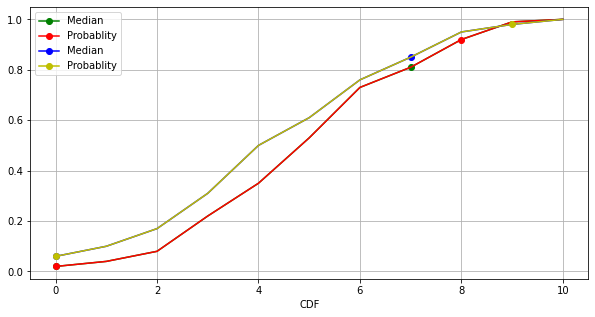

Maximum point-wise distance of both CDFs is : 0.010000000000000009


In [6]:
# sum_of_dice1,freq_of_dice1,median1,cumulative_sum1,prob_value1 = roll_dice(100)
plt.figure(figsize=[10,5])
plt.plot(cumulative_sum,marker='o',markevery=median,color='g',label='Median')
plt.plot(cumulative_sum,marker='o',markevery=prob_value,color='r',label='Probablity')

plt.plot(cumulative_sum1,marker='o',markevery=median1,color='b',label='Median')
plt.plot(cumulative_sum1,marker='o',markevery=prob_value1,color='y',label='Probablity')
plt.xlabel('CDF')

plt.legend()
plt.grid()
plt.show()


ks=[]
for i in range(0,len(cumulative_sum1)):
    ks.append(cumulative_sum[i]-cumulative_sum1[i])

print('Maximum point-wise distance of both CDFs is :',np.max(ks))


### Now repeat the simulation (2 times) with n=1000 and compute the maximum point-wise distance of both CDFs.

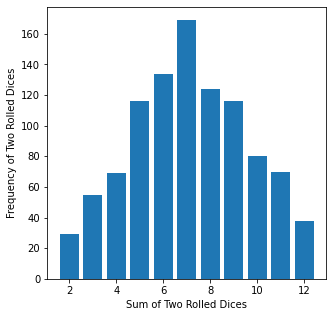

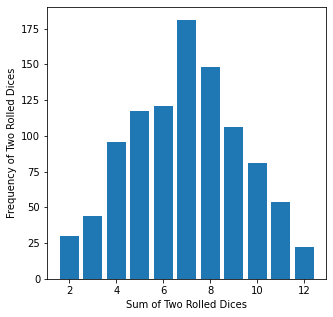

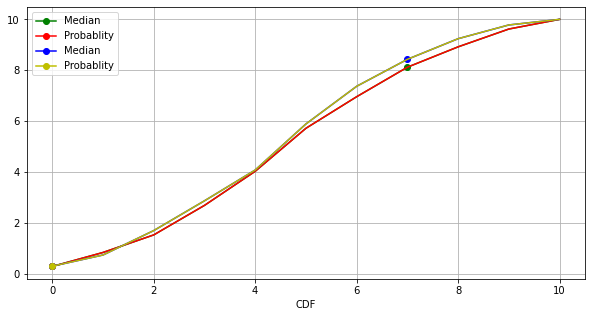

Maximum point-wise distance of both CDFs is : 0.10000000000000009


In [7]:
sum_of_dice1,freq_of_dice1,median1,cumulative_sum1,prob_value1 = roll_dice(1000)
sum_of_dice2,freq_of_dice2,median2,cumulative_sum2,prob_value2 = roll_dice(1000)

### Map Plotting
plt.figure(figsize=[5,5])
plt.bar(sum_of_dice1,freq_of_dice1)
plt.xlabel("Sum of Two Rolled Dices")
plt.ylabel("Frequency of Two Rolled Dices")

plt.figure(figsize=[5,5])
plt.bar(sum_of_dice2,freq_of_dice2)
plt.xlabel("Sum of Two Rolled Dices")
plt.ylabel("Frequency of Two Rolled Dices")


plt.figure(figsize=[10,5])

plt.plot(cumulative_sum1,marker='o',markevery=median1,color='g',label='Median')
plt.plot(cumulative_sum1,marker='o',markevery=prob_value1,color='r',label='Probablity')
plt.plot(cumulative_sum2,marker='o',markevery=median2,color='b',label='Median')
plt.plot(cumulative_sum2,marker='o',markevery=prob_value2,color='y',label='Probablity')
plt.xlabel('CDF')
plt.legend()
plt.grid()
plt.show()

ks=[]
for i in range(0,len(cumulative_sum1)):
    ks.append(cumulative_sum1[i]-cumulative_sum2[i])
    

print('Maximum point-wise distance of both CDFs is :',np.max(ks))